## 3. Add alternate energy intensity data

More up-to-date energy intensity data is available in Enerdata (2019), but again only through a static download, as there is no easily accessible API.

In [1]:
import glob
import os
import pandas as pd
import pycountry
import matplotlib.pyplot as plt
from io import StringIO

# find target path for data files, assuming the notebook is in the right place
data_path = _dh[0]
assert data_path.endswith(os.path.join('em-2020','data'))

Load the (nicely formatted) Enerdata file, dropping the header and footer.

In [2]:
enerdata_file = 'world-energy-intensity-gdp-data.xls'
enerdata = pd.read_excel(os.path.join(data_path, enerdata_file), skiprows=2, index_col=0)
enerdata = enerdata.dropna(how='all').T
enerdata.iloc[:5, :5]

,World,OECD,G7,BRICS,Europe
1990,0.175524,0.147173,0.152821,0.266920,0.124778
1991,0.174521,0.147039,0.152421,0.263266,0.124008
1992,0.171902,0.145498,0.150994,0.261200,0.120619
1993,0.170640,0.145553,0.151081,0.256207,0.120640
1994,0.167117,0.143866,0.149363,0.245267,0.117548


Find the appropriate data for each country and add it to the data files.

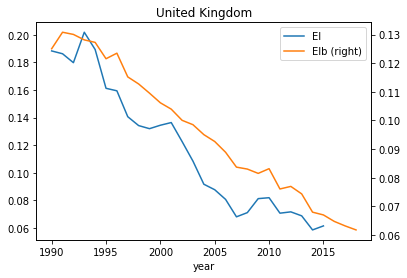

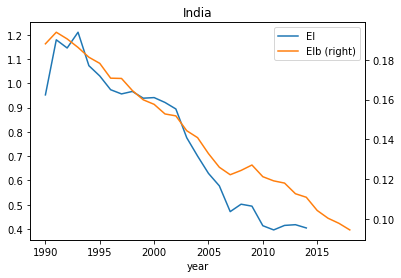

In [3]:
for wb_file in glob.glob(os.path.join(data_path, 'WB_*.csv')):
    country = os.path.basename(wb_file).split('_')[1]
    wb_data = pd.read_csv(wb_file).set_index('year')
    country_name = pycountry.countries.get(alpha_3=country).name
    if country_name in enerdata:
        wb_data['EIb'] = enerdata[country_name]
        wb_data.loc[1990:, ['EI', 'EIb']].plot(secondary_y='EIb')
        plt.title(country_name)
        wb_data.to_csv(wb_file)